# Θεωρία Πληροφορίας
### Σειρά 2
*Edited by : Κωνσταντίνος Τσαούσης 03117652*

Η παρακάτω εργασία περιέχει τον κώδικα που χρησιμοποίησα για την επίλυση της πρώτης σειράς ασκήσεων  για το μάθημα της Θεωρίας Πληροφορίας 9ου εξαμήνου, μαζί με τα σχόλια και τα αποτελέσματα. 


### Βοηθητικός κώδικας/ εντροπία

In [1]:

import numpy as np
from scipy.special import comb

def Entropy(probs):
  entropy = 0
  for i in range(len(probs)):
      if probs[i] != 0:
          entropy -= probs[i] * np.log2(probs[i])
  return round(entropy,3)

def KL_distance(Pprobs,Qprobs):
  distance = 0
  if 0 in Qprobs:
      return float('inf')
  for i in range(len(Pprobs)):
      if Pprobs[i] != 0:
          distance += Pprobs[i] * np.log2(Pprobs[i] / Qprobs[i])
  return round(distance,3)

# Άσκηση 1η

### 1)

Το ελάχιστο και το µέγιστο πλήθος από bits ίσα µε 1 που εµφανίζονται σε ακολουθίες που ανήκουν στο τυπικό σύνολο A, για ε=1/20, σύμφωνα με τον τύπο του βιβλίου είναι:

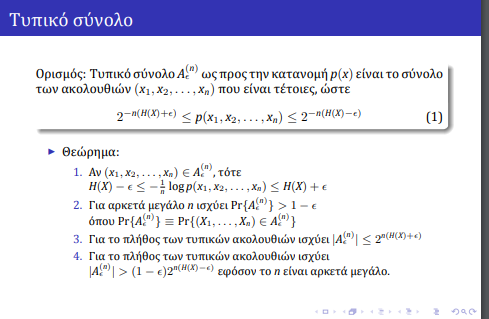

In [63]:
print('Entropy =',Entropy([1/10,9/10]))
temp1 = -2000 * (Entropy([1/10,9/10]) + 1/20)
temp2 = -2000 * (Entropy([1/10,9/10]) - 1/20)
downlimit = 2 ** temp1
uplimit = 2 ** temp2
print('lower typ set limit =',downlimit)
print('upper typ set limit =',uplimit)



Entropy = 0.469
lower typ set limit = 3.39519326554e-313
upper typ set limit = 5.45586522601527e-253


In [65]:
lower = 2000
upper = 0
for i in range(2000):
    probability = (1/10) ** i * (9/10) ** (2000 - i)
    if probability < uplimit and probability > downlimit:
        lower = min(i,lower)
        upper = max(i,upper)
print("Minimum number of 1s in typical set =",lower)
print("Maximum number of 1s in typical set =",upper)


Minimum number of 1s in typical set = 169
Maximum number of 1s in typical set = 231


Αυτό που στην ουσία κάνουμε παραπάνω, είναι να τρέχουμε όλους τους πιθανόυς συνδυασμόυς απο άσσους και μηδέν(ουσιαστικά ξεκινάμε με 1 άσσο και 1999 μηδενικά, και μετα λουπάρουμε) και υπολογιζούμε την πιθανότητα της κάθε μια τέτοιας ακολουθίας. Εαν αυτή είναι μικρότερη απο το uplimit και μεγαλύτερη απο το downlimit, δηλαδή βρίσκεται μέσα στο typical set, κρατάμε το i της (δηλαδή τον αριθμό απο άσσους) εφόσον είναι μικρότερο απο το ήδη υπάρχων.

Τα αποτελέσματα μας λένε ότι μέσα στο τυπικό σύνολο βρίσκονται οι ακολουθίες που έχουν απο *169-229* άσσους, και τα υπόλοιπα bits μηδενικά. Διαισθητικώς το αποτέλεσμα ακούγεται λογικό, εφόσον η πιθανότητα ένα bit να είναι άσσος ειναι 1/10 και το σύνολο των bit είναι 2000

### 2) 

Εφόσον γνωρίζουμε τα άνω κα κάτω όρια 1 bits στις ακολουθίες που είναι στο τυπικό σύνολο, μπορούμε να τα χρησιμοποιήσουμε για να βρούμε την συνολική πιθανότητα του αθροίζωντας τις πιθανότητες απο το lower στο upper limit. 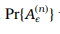

In [70]:
from decimal import *
Ae = 0
for i in range(169,229):
    Ae += comb(2000,i) * (1/10) ** i * (9/10) ** (2000 - i)
print('Συνολική πιθανότητα τυπικού συνόλου:')
print('Pr{Aε} =',Ae)

Συνολική πιθανότητα τυπικού συνόλου:
Pr{Aε} = 0.9734876192492798


### 3) 
Ο λόγος προκύπτει 4.17778083403711E-296, και ομοίως προκύπτει το ποσοστό



In [87]:
card_Ae = 0
for i in range(169,229):
    card_Ae += comb(2000,i)
print("cardinality / 2 ^ 2000 = ",(Decimal(card_Ae) / (2 ** (2000))))


cardinality / 2 ^ 2000 =  4.17778083403711E-296


### 4) 
Η προσέγγιση σε αυτό το ερώτημα είναι ότι εφόσον όσο αυξάνεται το πλήθος των 1 bits, μειώνεται η πιθανότητα της ακολουθίας, προσθέτω στο set τις συμβολοσειρες με 0 ασσους(1 bits), 1 , 2 , 3 κτλπ μεχρι να φτάσω στην πιθανότητα του Αε. Στις τελευταίες ακολουθίας δεν χρειάζεται να τις πάρω όλες, αλλά ένα μέρος τους. 



To τελευταίο i που θα γίνει πριντ, θα είναι αυτό του max αριθμού άσσων που θα υπάρχουν στο set Β, και μας δίνει πλήρη εικόνα του αριθμόυ των άσσων, εφόσον σύμφωνα με την τεχνική που ακολουθούμε θα υπάρχουν στο σετ και οι ακολουθίες με όλους τους προηγούμενους αριθμόυς άσσων πριν απο αυτό το max. (δηλαδή max-1,max-2,max-3 μέχρι και το 0

In [139]:
Bd = 0
card_Bd = 0
for i in range(1,2000):
    Bd += (9/10) ** i * (1/10) ** (2000 - i)
    combi += Decimal(comb(2000,i)/10000) 
    # card_Bd = Decimal(card_Bd) + Decimal(comb(2000,i))
    if (Bd >= Ae):
  
        break


print(i)

227


Παρατηρούμε ότι είναι λιγότεροι απο το τυπικό σύνολο (οι άσσοι) πράγμα απολύτως λογικό.

### 5)

Ακολουθώντας την ίδια λογική έχουμε :

In [121]:
Bd = 0
card_Bd = 0
for i in range(2000):
    Bd += comb(2000,i) * (9/10) ** i * (1/10) ** (2000 - i)
    card_Bd = card_Bd + Decimal(comb(2000,i))
    if (Bd > Ae):
        card_Bd -= Decimal(comb(2000,i))
        break

print("Ratio = ",round(Decimal(card_Ae) / Decimal(card_Bd),2))

Ratio =  457,54


# Άσκηση 2η

### 1) Υπολογίζωντας την μέση τιμή και την διασπορά απο τον τύπο, έχουμε για την μέση τιμή 20 και για την διασπορά ρίζα(18)=4,242,..=περίπου 4

In [57]:
m=20
s=4
print("From = ", m-2*s)
print("From = ", m+2*s)


From =  12
From =  28


### 2)

In [58]:
words=0
for i in range(12,28):
  words += comb(200,i)


print("Λέξεις που παρουσιάζουν αριθµό µονάδων από µ − 2σ ως µ + 2σ : ", words)

total=2**200
print(total)
print
print("Λόγος του πλήθους τους προς το συνολικό πλήθος των 2^200 δυνατών λέξεων : ", words/total)


Λέξεις που παρουσιάζουν αριθµό µονάδων από µ − 2σ ως µ + 2σ :  2.3183265654223035e+33
1606938044258990275541962092341162602522202993782792835301376
Λόγος του πλήθους τους προς το συνολικό πλήθος των 2^200 δυνατών λέξεων :  1.4426981635694342e-27


Ένα πλοτάρισμα της γκαουσιανής

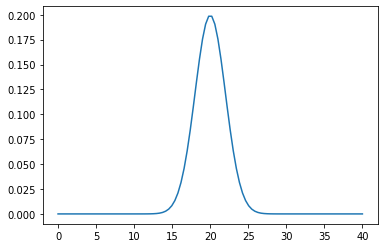

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

sigma = math.sqrt(s)
x = np.linspace(m - 10*sigma, m + 10*sigma, 100)
plt.plot(x, stats.norm.pdf(x, m, sigma))
plt.show()

### 3)

Για την κωδικοποίηση στην ουσία θεωρούμε μια διάταξη τους και έπειτα τις κωδικοποιύμε με τον αύξων αριθμό τους (δηλαδή την θέση στην οποία βρίσκονται σε αυτήν την διάταξη). Παρακάτω φαίνεται ότι τα bits που θα χρειαστούμε, με στρογγυλοποίηση προς τα πάνω είναι 111, και θα προσθέσουμε και άλλο ένα για το πρόθεμα άρα σύνολο 112


In [60]:
round(math.log2(words))

111

### 4) 

In [99]:
probability = 0
###finding total probabilty
for i in range(12,29):
    probability += comb(200,i) * (1/10) ** i * (9/10) ** (200-i)
print("Η πιθανότητα µια λέξη να έχει λιγότερους άσσους από μ-2σ , η περισσότερους από μ+2σ =",1-probability)

Η πιθανότητα µια λέξη να έχει λιγότερους άσσους από μ-2σ , η περισσότερους από μ+2σ = 0.04388176328854432


### 5)

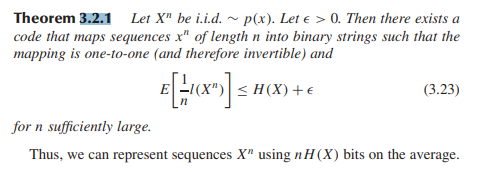

Δηλαδή μια ακολουθία Xn
μπορεί να παρασταθεί από nH(X) bits κατά μέσο όρο και τουλάχιστον n(H+ε). Δηλαδή στην προκειμένη περίπτωηση 93 κατα μέσο όρο και **τουλάχιστον** **103** **bits**

In [108]:
ε=1-probability
print("Κατα μέσο όρο :",round(200*(Entropy([1/10,9/10]))))
print("Τουλάχιστον :",round(200*(Entropy([1/10,9/10])+ε)))

Κατα μέσο όρο : 94
Τουλάχιστον : 103
